In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mysql.connector
import pymysql
import plotly.express as px



In [8]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="123456"
)

NameError: name 'mysql' is not defined

## Analyze the multiple measurements in taxonomic problems of Iris dataset.

In [9]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='123456',
                             db='iris')


cursor=connection.cursor()

cursor.execute('SELECT * FROM iris.iris')

for row in cursor:
    print(row)

NameError: name 'pymysql' is not defined

### Data Exploration:

In [16]:
sql01 = cursor.execute('SELECT AVG(SepalLengthCm) FROM iris.iris')
for row in cursor:
    print(row)

sql02 = cursor.execute('SELECT Sum(SepalLengthCm) FROM iris.iris')
for row in cursor:
    print(row)

sql03 = cursor.execute('SELECT AVG(PetalLengthCm) FROM iris.iris')
for row in cursor:
    print(row)

sql04 = cursor.execute('SELECT Sum(PetalLengthCm) FROM iris.iris')
for row in cursor:
    print(row)

NameError: name 'cursor' is not defined

### Data Wrangling

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/Weicaidata/602_Fall2020/master/Iris.csv')

df = df.drop('Id', axis=1)

df.rename(columns = {'SepalWidthCm':'sepal_width', 'SepalLengthCm':'sepal_length', 'Species':'SPECIES'}, inplace = True)

print (df)

     sepal_length  sepal_width  PetalLengthCm  PetalWidthCm         SPECIES
0             5.1          3.5            1.4           0.2     Iris-setosa
1             4.9          3.0            1.4           0.2     Iris-setosa
2             4.7          3.2            1.3           0.2     Iris-setosa
3             4.6          3.1            1.5           0.2     Iris-setosa
4             5.0          3.6            1.4           0.2     Iris-setosa
5             5.4          3.9            1.7           0.4     Iris-setosa
6             4.6          3.4            1.4           0.3     Iris-setosa
7             5.0          3.4            1.5           0.2     Iris-setosa
8             4.4          2.9            1.4           0.2     Iris-setosa
9             4.9          3.1            1.5           0.1     Iris-setosa
10            5.4          3.7            1.5           0.2     Iris-setosa
11            4.8          3.4            1.6           0.2     Iris-setosa
12          

### Data Visualizations:

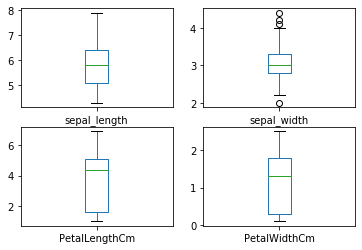

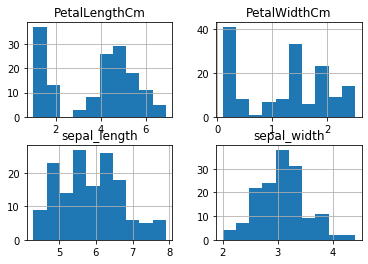

In [21]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

plt.show()

df.hist()

plt.show()

From the graph, we can see two of the input variables have a normal distribution.


###  Conclusion: we can see Blue points (Iris-setosa) can be easily separated from red (Irir-versicolor) and green (Iris-virginica) by using PetalLength and PetalWidth.

### Machine Learning 

In [23]:
array = df.values

X = array[:,0:4]

y = array[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, stratify = y)

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.95


### The accuracy is 95%